<a href="https://colab.research.google.com/github/LBMH-lang/LBMH/blob/master/%C4%90%E1%BB%93_%C3%A1n_k%E1%BA%BFt_th%C3%BAc_h%E1%BB%8Dc_ph%E1%BA%A7n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Sử dụng tập tin Inc_Exp_Data.csv để thực hiện phân tích thống kê mô tả về tập dữ liệu này**

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import scipy.stats as stats

In [3]:
Du_lieu1 = pd.read_csv("Diet_R.csv")

In [4]:
Du_lieu1.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
42,64,0.0,56,171,73,3,68.9
55,41,1.0,51,191,71,2,66.8
59,45,1.0,45,160,78,2,72.7
62,48,1.0,40,171,79,2,72.9
56,42,1.0,38,199,75,2,72.6
61,47,1.0,44,163,79,2,73.6
44,66,0.0,41,157,76,3,71.0
64,50,1.0,39,180,80,2,81.4
76,77,1.0,40,167,87,3,77.8
57,43,1.0,54,196,75,2,69.2


Chạy mô hình kiểm định ANOVA

In [6]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [13]:
model = ols('weight6weeks ~ C(gender)', data=Du_lieu1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [14]:
anova_table

,sum_sq,df,F,PR(>F)
C(gender),2596.187542,1.0,84.454874,7.289364e-14
Residual,2274.799168,74.0,NaN,NaN


In [63]:
Du_lieu1.drop('Person', axis= 1, inplace= True)

In [64]:
high = low =  placebo = []
high = Du_lieu1['gender'][Du_lieu1['Age'][Du_lieu1['Height'][Du_lieu1['pre.weight'][Du_lieu1['Diet'][Du_lieu1['weight6weeks'] == 'high']]]]]
low = Du_lieu1['gender'][Du_lieu1['Age'][Du_lieu1['Height'][Du_lieu1['pre.weight'][Du_lieu1['Diet'][Du_lieu1['weight6weeks'] == 'low']]]]]
placebo = Du_lieu1['gender'][Du_lieu1['Age'][Du_lieu1['Height'][Du_lieu1['pre.weight'][Du_lieu1['Diet'][Du_lieu1['weight6weeks'] == 'placebo']]]]]

In [65]:
gender = Du_lieu1['gender']
Age = Du_lieu1['Age']
Height = Du_lieu1['Height']
weight = Du_lieu1['pre.weight']
Diet = Du_lieu1['Diet']
weight6weeks = Du_lieu1['weight6weeks']

In [11]:
class thongke():
    def __init__(self, data):
        self.mean = np.mean(data)
        self.med = np.median(data)
        self.mod = statistics.mode(data)
        self.min = np.min(data)
        self.max = np.max(data)
        self.std = np.std(data)
        self.name = data.name
        self.data = (data - self.mean) /self.std
      
    def hist(self):
        plt.figure()
        ax = sns.distplot(self.data)
        plt.axvline(np.mean(self.data), color="r", linestyle="dashed", linewidth=5)
        _, max_ = plt.ylim()
        plt.text(
            self.data.mean() + self.data.mean() / 10,
            max_ - max_ / 10,
            "Mean: {:.2f}".format(self.mean),
        )
        plt.title(self.name)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show();   
    def qq(self):
        sm.qqplot(self.data, line='45')
        plt.show()
        a = [0.25,0.5,0.75]
        b = self.data.quantile(a)
        c = pd.DataFrame(b,a)
        print(c)
        print('-'*50)
    def shapiro(self):
        print('Kiểm định Shapori:')
        stat, p = stats.shapiro(self.data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        else:
            print('Dữ liệu không tuân theo luật phân phối chuẩn, ta không thể sử dụng kiểm định Anova')
        print('-'*50)
    #def anova(self):
        #print('kiểm định anova:')
        #statistic, p_value = f_oneway(self.name)
        #print('statistic:',statistic, '; p value:',p_value)

In [ ]:
#Đầu tiên ta tiến hành kiểm tra các giả định
# Ta thấy các giả định đều độc lập với nhau
#"Giả định này được kiểm tra khi nghiên cứu được thiết kế.
#Điều này có nghĩa là tất cả các nhóm đều loại trừ lẫn nhau,
#tức là một cá nhân chỉ có thể thuộc về một nhóm.
#Ngoài ra, điều này có nghĩa là dữ liệu không phải là các thước đo lặp lại (không được thu thập theo thời gian). 
#Trong ví dụ này, điều kiện này được đáp ứng"

In [67]:
# tiếp theo ta sẽ dùng Kiểm định tính thuần nhất của phương sai (homogeneity of variance)
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(gender,Age,Height,weight,Diet,weight6weeks)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=656.9361929299977, pvalue=1.002775173314174e-139)
Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


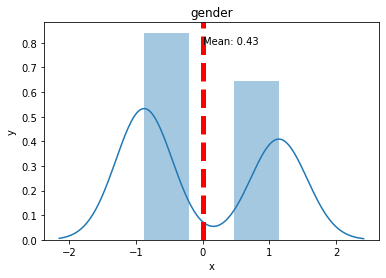

RuntimeError: ignored

In [68]:
gender = thongke(gender)
gender.hist()
gender.qq()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


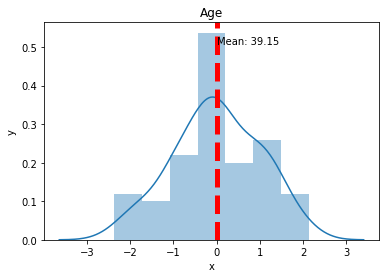

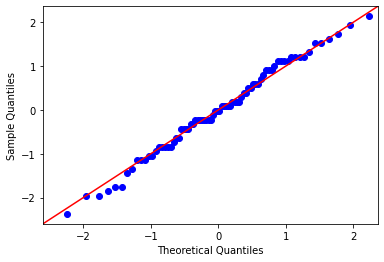

           Age
0.25 -0.707930
0.50 -0.015776
0.75  0.778921
--------------------------------------------------


In [71]:
Age = thongke(Age)
Age.hist()
Age.qq()

In [69]:
gender.shapiro()

Kiểm định Shapori:
stat=nan, p=1.000
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


In [77]:
Age.shapiro()

Kiểm định Shapori:
stat=0.987, p=0.645
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
--------------------------------------------------


In [82]:
print('Kiểm định ANOVA 1 chiều:')
stat, pvalue = stats.f_oneway(Du_lieu1['gender'].dropna(), Du_lieu1['Age'].dropna(),Du_lieu1['Height'].dropna(),Du_lieu1['pre.weight'].dropna(),Du_lieu1['Diet'].dropna(),Du_lieu1['weight6weeks'].dropna())
print('stat=%.5f, p=%.8f' % (stat, pvalue))
if (stat > 0) and (pvalue > 0.05):
    print('Không thể bác bỏ giả thiết H0: Các cặp giá trị trung bình bằng nhau')
else:
    print('Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.')
print('-'*50)

Kiểm định ANOVA 1 chiều:
stat=4844.41986, p=0.00000000
Có bắng chứng bác bỏ giả thuyết H0: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau.
--------------------------------------------------


In [78]:
# class phân tích avova
# đầu vào là một data frame
class projectAnova:
    def __init__(self,data):
        self.data = data
        self.samples = []
        for i in data.columns:
            self.samples.append(data[i].dropna())
    #kiem tra su phan phoi chuan
    def shapiro_test(self):
        for (stt, sample) in enumerate(self.samples):
            pv_s = stats.shapiro(sample)[1]
            if pv_s > 0.05:
                print(f'Mẫu {stt} tuân theo phân phối chuẩn')
            else:
                print(f'Mẫu {stt} không tuân theo phân phối chuẩn')
    #kiem tra su khac biet cua phuong sai
    def levene_test(self):
        pv_l = stats.levene(*self.samples)[1]
        if pv_l > 0.05:
            print('Phương sai bằng nhau')
        else:
            print('Có ít nhất một cặp Phương sai không bằng nhau')
    #anova test
    def anova_test(self):
        pv_a = stats.f_oneway(*self.samples)[1]
        if pv_a > 0.05:
            print('các giá trị trung bình bằng nhau')
        else:
            print('Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau')

In [80]:
a1 = projectAnova(Du_lieu1)

Kiểm định hậu nghiệm cho Anova (one-way)

In [17]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [15]:
tukey = pairwise_tukeyhsd(endog=Du_lieu1['weight6weeks'],
                          groups=Du_lieu1['gender'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,11.7919,0.001,8.4192,15.1646,True
0.0,nan,39.7767,0.001,25.0349,54.5186,True
0.0,nan,-3.2233,0.9,-17.9651,11.5186,False
1.0,nan,27.9848,0.001,13.1924,42.7773,True
1.0,nan,-15.0152,0.0453,-29.8076,-0.2227,True
nan,nan,-43.0,0.001,-63.6098,-22.3902,True


Mô tả trực quan hóa cho phần hậu nghiệm

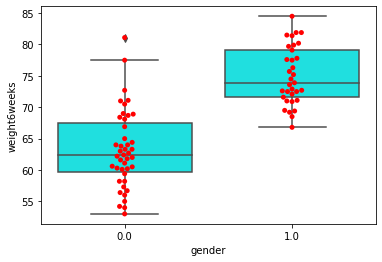

In [16]:
# Kỹ thuật EDA:
sns.boxplot(x='gender', y='weight6weeks', data=Du_lieu1, color='cyan')
sns.swarmplot(x="gender", y="weight6weeks", data=Du_lieu1, color='red')
plt.show()

In [20]:
gender_weight_df = Du_lieu1[['gender', 'weight6weeks']].copy()
white = gender_weight_df[gender_weight_df['gender']=='0.0']
black = gender_weight_df[gender_weight_df['gender']=='1.0']

In [23]:
p = {}
p['f_score'], p['p_value'] = stats.f_oneway(white['weight6weeks'],black['weight6weeks'])


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3333: RuntimeWarning: Mean of empty slice.
  offset = alldata.mean()
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3336: RuntimeWarning: invalid value encountered in double_scalars
  sstot = _sum_of_squares(alldata) - (_square_of_sums(alldata) / bign)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3343: RuntimeWarning: invalid value encountered in double_scalars
  ssbn -= _square_of_sums(alldata) / bign


{'f_score': nan, 'p_value': nan}

Trung bình cộng của cột Age

In [95]:
Mean1 = Du_lieu1['Age'].mean(axis = 0)
Mean1

39.15384615384615

Trung bình cộng của cột Height

In [96]:
Mean2 = Du_lieu1['Height'].mean(axis = 0)
Mean2

170.82051282051282

Trung bình cộng của cột pre.weight

In [97]:
Mean3 = Du_lieu1['pre.weight'].mean(axis = 0)
Mean3

72.52564102564102

Trung bình cộng của cột Diet

In [98]:
Mean4 = Du_lieu1['Diet'].mean(axis = 0)
Mean4

2.0384615384615383

Trung bình cộng của cột weight6weeks

In [99]:
Mean5 = Du_lieu1['weight6weeks'].mean(axis = 0)
Mean5

68.6807692307692

Tính phương sai

In [101]:
Mean_v = Du_lieu1.var(axis= 0)
Mean_v

gender            0.248947
Age              96.339660
Height          127.162171
pre.weight       76.096737
Diet              0.660839
weight6weeks     79.646768
dtype: float64

Tính độ lệch chuẩn 

In [102]:
Mean_s = Du_lieu1.std(axis= 0)
Mean_s

gender           0.498946
Age              9.815277
Height          11.276621
pre.weight       8.723344
Diet             0.812920
weight6weeks     8.924504
dtype: float64

# ***2) Sử dụng tập tin Diet_R.csv để thực hiện phân tích thống kê suy diễn - ANOVA một chiều. Tham khảo tập tin mô tả tập dữ liệu được kèm theo.***

In [5]:
df = pd.read_csv('Inc_Exp_Data.csv')
df.sample(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
16,25000,20000,3,3500,261000,Graduate,1
4,12500,12000,2,3000,147000,Graduate,1
22,34000,19000,6,0,330480,Professional,1
43,80000,20000,4,0,1075200,Graduate,1
38,55000,45000,6,12000,600600,Graduate,2
23,34000,25000,3,4000,469200,Professional,1
27,40000,10000,4,0,412800,Under-Graduate,1
2,10000,4500,2,0,112800,Under-Graduate,1
19,30000,13000,4,0,385200,Graduate,1
0,5000,8000,3,2000,64200,Under-Graduate,1


 Trung bình cộng của từng cột

In [6]:
Mean_EX = df.mean(axis = 0)
Mean_EX

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
dtype: float64

Phương sai của từng cột

In [7]:
Mean_EX2 = df.var(axis= 0)
Mean_EX2

Mthly_HH_Income          6.811009e+08
Mthly_HH_Expense         1.461733e+08
No_of_Fly_Members        2.302449e+00
Emi_or_Rent_Amt          3.895551e+07
Annual_HH_Income         1.024869e+11
No_of_Earning_Members    5.391837e-01
dtype: float64

Độ lệch chuẩn của từng cột

In [8]:
Mean_EX3 = df.std(axis= 0)
Mean_EX3

Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

Giá trị lớn nhất và nhỏ nhất của từng cột 

In [9]:
max1 = np.nanmax(df.iloc[:, 1].values)
min1 = np.nanmin(df.iloc[:, 1].values)
max2 = np.nanmax(df.iloc[:, 2].values)
min2 = np.nanmin(df.iloc[:, 2].values)
max3 = np.nanmax(df.iloc[:, 3].values)
min3 = np.nanmin(df.iloc[:, 3].values)
max4 = np.nanmax(df.iloc[:, 4].values)
min4 = np.nanmin(df.iloc[:, 4].values)
max5 = np.nanmax(df.iloc[:, 5].values)
min5 = np.nanmin(df.iloc[:, 5].values)
max6 = np.nanmax(df.iloc[:, 6].values)
min6 = np.nanmin(df.iloc[:, 6].values)
print('max cua Mthly_HH_Income', max1)
print('min cua Mthly_HH_Income', min1)
print('max cua Mthly_HH_Expense', max2)
print('min cua Mthly_HH_Expense', min2)
print('max cua No_of_Fly_Members', max3)
print('min cua No_of_Fly_Members', min3)
print('max cua Emi_or_Rent_Amt', max4)
print('min cua Emi_or_Rent_Amt', min4)
print('max cua Annual_HH_Income', max5)
print('min cua Annual_HH_Income', min5)
print('max cua No_of_Earning_Members', max6)
print('min cua No_of_Earning_Members', min6)

max cua Mthly_HH_Income 50000
min cua Mthly_HH_Income 2000
max cua Mthly_HH_Expense 7
min cua Mthly_HH_Expense 1
max cua No_of_Fly_Members 35000
min cua No_of_Fly_Members 0
max cua Emi_or_Rent_Amt 1404000
min cua Emi_or_Rent_Amt 64200
max cua Annual_HH_Income Under-Graduate
min cua Annual_HH_Income Graduate
max cua No_of_Earning_Members 4
min cua No_of_Earning_Members 1


In [15]:
high = low =  placebo = []
high = df['Mthly_HH_Expense'][df['No_of_Fly_Members'][df['Emi_or_Rent_Amt'][df['Annual_HH_Income'][df['Highest_Qualified_Member'][df['No_of_Earning_Members'] == 'high']]]]]
low = df['Mthly_HH_Expense'][df['No_of_Fly_Members'][df['Emi_or_Rent_Amt'][df['Annual_HH_Income'][df['Highest_Qualified_Member'][df['No_of_Earning_Members'] == 'low']]]]]
placebo = df['Mthly_HH_Expense'][df['No_of_Fly_Members'][df['Emi_or_Rent_Amt'][df['Annual_HH_Income'][df['Highest_Qualified_Member'][df['No_of_Earning_Members'] == 'placebo']]]]]

In [14]:
Mthly_HH_Expense = df['Mthly_HH_Expense']
No_of_Fly_Members = df['No_of_Fly_Members']
Emi_or_Rent_Amt = df['Emi_or_Rent_Amt']
Annual_HH_Income = df['Annual_HH_Income']
Highest_Qualified_Member = df['Highest_Qualified_Member']
No_of_Earning_Members = df['No_of_Earning_Members']

In [20]:
# tiếp theo ta sẽ dùng Kiểm định tính thuần nhất của phương sai (homogeneity of variance)
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(Mthly_HH_Expense, No_of_Fly_Members, Emi_or_Rent_Amt, Annual_HH_Income, No_of_Earning_Members)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=2764.519639416905, pvalue=0.0)
Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


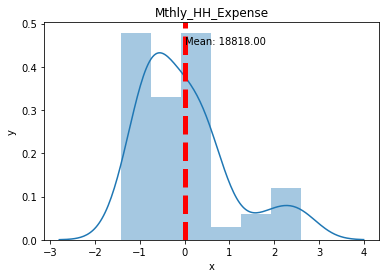

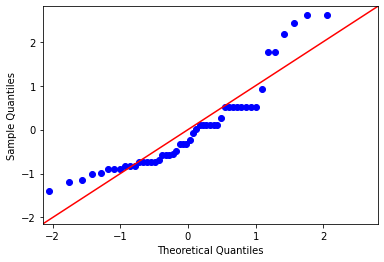

      Mthly_HH_Expense
0.25         -0.736755
0.50         -0.277223
0.75          0.516514
--------------------------------------------------


In [21]:
Mthly_HH_Expense = thongke(Mthly_HH_Expense)
Mthly_HH_Expense.hist()
Mthly_HH_Expense.qq()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


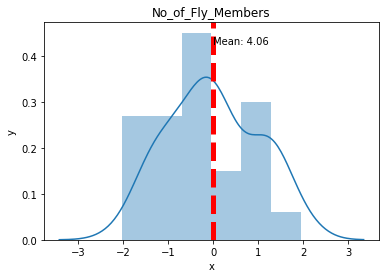

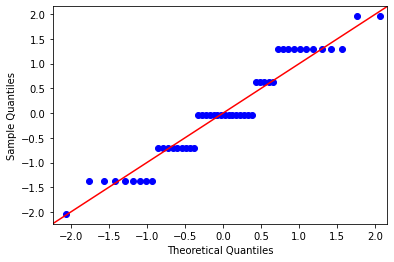

      No_of_Fly_Members
0.25          -0.705664
0.50          -0.039943
0.75           0.625777
--------------------------------------------------


In [22]:
No_of_Fly_Members = thongke(No_of_Fly_Members)
No_of_Fly_Members.hist()
No_of_Fly_Members.qq()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


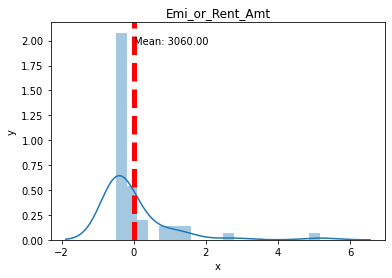

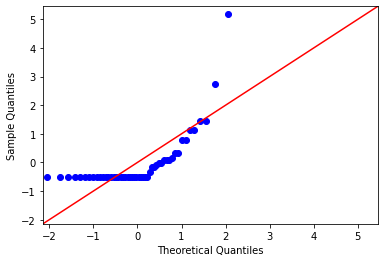

      Emi_or_Rent_Amt
0.25        -0.495249
0.50        -0.495249
0.75         0.071212
--------------------------------------------------


In [23]:
Emi_or_Rent_Amt = thongke(Emi_or_Rent_Amt)
Emi_or_Rent_Amt.hist()
Emi_or_Rent_Amt.qq()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


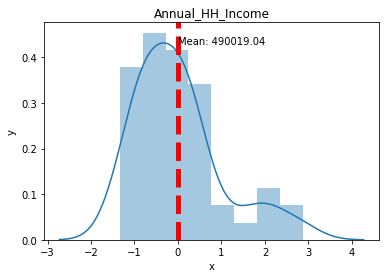

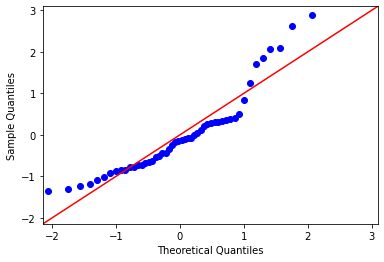

      Annual_HH_Income
0.25         -0.729743
0.50         -0.134416
0.75          0.330372
--------------------------------------------------


In [24]:
Annual_HH_Income = thongke(Annual_HH_Income)
Annual_HH_Income.hist()
Annual_HH_Income.qq()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


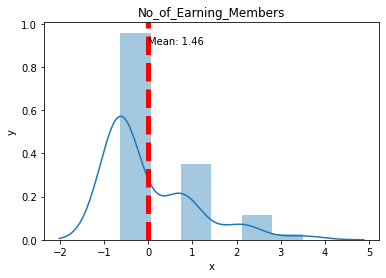

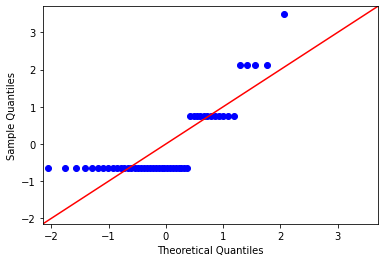

      No_of_Earning_Members
0.25              -0.632815
0.50              -0.632815
0.75               0.742869
--------------------------------------------------


In [25]:
No_of_Earning_Members = thongke(No_of_Earning_Members)
No_of_Earning_Members.hist()
No_of_Earning_Members.qq()

In [26]:
Mthly_HH_Expense.shapiro()

Kiểm định Shapori:
stat=0.873, p=0.000
Dữ liệu không tuân theo luật phân phối chuẩn, ta không thể sử dụng kiểm định Anova
--------------------------------------------------


In [27]:
No_of_Fly_Members.shapiro()

Kiểm định Shapori:
stat=0.933, p=0.007
Dữ liệu không tuân theo luật phân phối chuẩn, ta không thể sử dụng kiểm định Anova
--------------------------------------------------


In [28]:
Emi_or_Rent_Amt.shapiro()

Kiểm định Shapori:
stat=0.554, p=0.000
Dữ liệu không tuân theo luật phân phối chuẩn, ta không thể sử dụng kiểm định Anova
--------------------------------------------------


In [29]:
Annual_HH_Income.shapiro()

Kiểm định Shapori:
stat=0.891, p=0.000
Dữ liệu không tuân theo luật phân phối chuẩn, ta không thể sử dụng kiểm định Anova
--------------------------------------------------


In [32]:
No_of_Earning_Members.shapiro()

Kiểm định Shapori:
stat=0.663, p=0.000
Dữ liệu không tuân theo luật phân phối chuẩn, ta không thể sử dụng kiểm định Anova
--------------------------------------------------
